# Introduction

- Nama: Argon
- Batch: HCK 004

- Background

Tujuan dari laporan ini adalah ...

- Objective

...

# Import Libraries

In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 3.7 MB/s eta 0:00:00


In [2]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense,Input,Dropout,BatchNormalization
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik import phik_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix ,accuracy_score, roc_curve,roc_auc_score,precision_score, recall_score, classification_report, f1_score
from feature_engine.outliers import Winsorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/M1-Phase2

/content/drive/My Drive/M1-Phase2


In [5]:
missing_values = ['n/a', 'na', '--', '? ', ' nan', 'no', ' ?']
df = pd.read_csv('churn.csv',na_values=missing_values)
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [6]:
df.duplicated().sum()

18

In [7]:
df[df.duplicated()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,...,497.320000,15082.13,11.0,730.340000,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
16165,9c8c2db425854d5e,54,M,NaN,Platinum Membership,2015-09-28,Yes,Without Offers,Smartphone,Fiber_Optic,...,1267.660000,38244.30,18.0,741.640000,No,Yes,No,Not Applicable,No reason specified,0
22341,9186d6f284e4ac5b,59,M,Town,Basic Membership,2015-01-07,NaN,Credit/Debit Card Offers,Desktop,Mobile_Data,...,266.190000,48632.63,19.0,654.590000,Yes,Yes,Yes,Unsolved,Poor Website,1
24693,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
26214,a594feaffc78b36b,58,M,City,Basic Membership,2017-04-01,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,...,0.000000,7614.88,29.0,202.317926,Yes,No,No,Not Applicable,Poor Customer Service,1
26687,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,...,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

<Figure size 400x600 with 0 Axes>

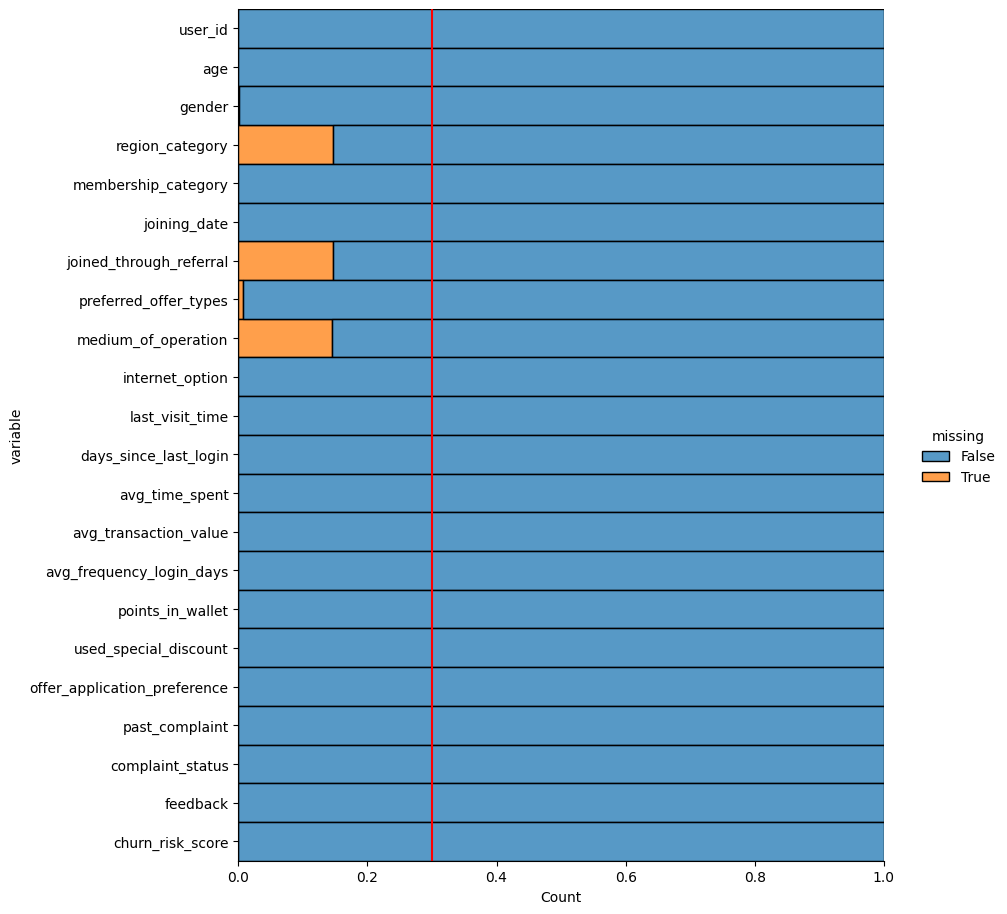

In [11]:
plt.figure(figsize=(4, 6))

sns.displot(data=df.isnull().melt(value_name="missing"),
            y="variable",
            hue="missing",
            multiple="fill",
            height=9.25)

plt.axvline(0.3, color="r")

In [12]:
# Melakukan deteksi non standard missing value di atas

df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [13]:
df.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [14]:
df['user_id'].unique()

array(['9f420209e7d129f3', 'ac6e97806267549e', 'a6aa19b1580eed4e', ...,
       '9329a6297407334a', 'a4403ddda8fcf9f3', '93b5d0330d24fa15'],
      dtype=object)

In [15]:
df['age'].unique()

array([29, 50, 26, 63, 64, 35, 43, 15, 49, 53, 33, 24, 36, 23, 40, 27, 48,
       54, 62, 28, 59, 19, 18, 47, 32, 57, 52, 61, 12, 30, 22, 41, 58, 60,
       11, 17, 14, 51, 39, 56, 34, 16, 21, 10, 55, 13, 25, 46, 20, 44, 31,
       38, 37, 42, 45])

In [16]:
df['gender'].unique()

array(['F', 'M', nan], dtype=object)

In [17]:
df[df['gender'].isna()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
22,be55c26b06eeb561,54,NaN,City,Basic Membership,2017-03-18,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,156.07000,32463.61,16.000000,639.820000,Yes,No,Yes,No Information Available,Poor Product Quality,1
145,a159641a5f8deac9,47,NaN,Town,Silver Membership,2015-04-20,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,262.65000,35934.73,19.000000,784.300000,Yes,Yes,Yes,Solved,Poor Website,0
728,b85b3149c460cd02,40,NaN,City,Silver Membership,2017-01-01,No,Without Offers,Desktop,Mobile_Data,...,333.25000,21440.09,18.000000,749.310000,Yes,No,No,Not Applicable,Products always in Stock,0
2304,94070fc001e5d60b,23,NaN,Village,Premium Membership,2017-10-28,Yes,Gift Vouchers/Coupons,NaN,Wi-Fi,...,93.88000,38875.53,22.000000,1181.889841,Yes,No,Yes,Unsolved,Poor Website,0
2586,8f54a6a4f89f7305,41,NaN,City,No Membership,2016-11-05,Yes,Without Offers,NaN,Fiber_Optic,...,52.11000,28298.29,6.000000,548.630000,No,Yes,Yes,Unsolved,Poor Product Quality,1
3926,8ace27a9d93861b0,13,NaN,Town,No Membership,2016-09-18,NaN,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,549.90000,15737.81,9.000000,573.000000,No,Yes,Yes,Unsolved,Too many ads,1
4023,9518edceea074d43,26,NaN,City,Basic Membership,2017-05-07,NaN,Without Offers,Smartphone,Wi-Fi,...,259.82000,21380.00,0.000000,0.000000,No,Yes,No,Not Applicable,Poor Website,1
4328,8c8af015fb0c05cd,52,NaN,Town,Gold Membership,2017-08-03,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,...,128.28000,15277.33,28.000000,787.840000,Yes,No,Yes,Solved,Poor Customer Service,0
5912,8d67e181f8dac02a,53,NaN,Village,Basic Membership,2015-09-13,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,...,650.07000,26235.35,0.000000,532.600000,No,Yes,Yes,No Information Available,No reason specified,1
5979,b0eff1eecbf9eb56,18,NaN,NaN,Platinum Membership,2015-12-15,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,221.57000,12808.70,7.000000,0.000000,Yes,No,Yes,Solved in Follow-up,No reason specified,0


In [18]:
df.dropna(subset=['gender'],inplace=True)

In [19]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [20]:
df['region_category'].unique()

array([nan, 'City', 'Village', 'Town'], dtype=object)

In [21]:
df[df['region_category'].isna()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.30,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,...,39.85,24087.96,10.0,656.380000,Yes,No,No,Not Applicable,No reason specified,1
13,8a2770c75d7ca0f3,33,M,NaN,No Membership,2016-01-25,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,142.85,9854.95,15.0,1357.366572,No,Yes,No,Not Applicable,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,9814f1d3a7bc587c,12,F,NaN,Basic Membership,2017-02-17,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,41.10,37677.31,9.0,561.200000,Yes,No,No,Not Applicable,No reason specified,1
36988,9afb485363a32b12,45,F,NaN,Gold Membership,2016-02-20,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,...,30.79,43048.44,12.0,689.440000,No,Yes,No,Not Applicable,Poor Website,1
36991,a6f0555c497dad8c,50,M,NaN,Silver Membership,2017-03-11,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,31.39,41364.87,10.0,744.750000,Yes,No,Yes,No Information Available,Too many ads,0
36996,87b2cfb9c6df3e13,63,F,NaN,Gold Membership,2015-09-10,Yes,Without Offers,Smartphone,Mobile_Data,...,105.90,21985.81,27.0,603.350000,No,Yes,Yes,Solved,Too many ads,1


In [22]:
df.fillna(value={'region_category': df['region_category'].mode()[0]}, inplace=True)

In [23]:
df['region_category'].unique()

array(['Town', 'City', 'Village'], dtype=object)

In [24]:
df['membership_category'].unique()

array(['No Membership', 'Basic Membership', 'Silver Membership',
       'Premium Membership', 'Gold Membership', 'Platinum Membership'],
      dtype=object)

In [25]:
df['joining_date'].unique()

array(['2017-04-05', '2017-03-31', '2017-02-11', ..., '2015-04-08',
       '2015-08-06', '2015-01-20'], dtype=object)

In [26]:
df['joined_through_referral'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [27]:
df[df['joined_through_referral'].isna()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
12,8578cd74b0eb2c83,24,F,Village,Silver Membership,2016-04-05,NaN,Without Offers,Smartphone,Mobile_Data,...,160.270000,49607.97,20.0,0.00,No,Yes,Yes,Solved,Too many ads,1
16,b1807a7cb1c66671,63,M,Town,Silver Membership,2015-06-13,NaN,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,92.070000,21395.38,26.0,667.71,No,Yes,No,Not Applicable,Too many ads,1
19,a19f84a19e38e20c,40,M,City,No Membership,2015-05-05,NaN,Without Offers,Desktop,Wi-Fi,...,119.120000,4384.76,8.0,0.00,Yes,No,Yes,Solved,Too many ads,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36998,bbb3a45b217bd6d9,18,F,Town,Premium Membership,2016-05-29,NaN,Without Offers,Smartphone,Mobile_Data,...,401.110000,61048.95,9.0,787.61,Yes,Yes,No,Not Applicable,User Friendly Website,0
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0


In [28]:
df.fillna(value={'joined_through_referral': df['joined_through_referral'].mode()[0]}, inplace=True)

In [29]:
df['joined_through_referral'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df['preferred_offer_types'].unique()

array(['Without Offers', 'Credit/Debit Card Offers',
       'Gift Vouchers/Coupons', nan], dtype=object)

In [31]:
df[df['preferred_offer_types'].isna()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
90,83f7dd56ba3a0464,52,F,Town,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,...,68.820000,28467.12,0.00000,0.000000,Yes,No,No,Not Applicable,Poor Customer Service,1
164,8770519c75c4b2d3,58,M,City,Silver Membership,2017-07-07,No,NaN,NaN,Mobile_Data,...,173.870000,1045.85,24.00000,638.630000,No,Yes,No,Not Applicable,Too many ads,1
171,b42a19688ed2c20b,47,F,Town,No Membership,2017-07-20,No,NaN,Smartphone,Fiber_Optic,...,1033.552633,45197.88,7.00000,626.870000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
246,88c4c93b81513e57,63,M,City,Gold Membership,2017-08-19,Yes,NaN,Smartphone,Fiber_Optic,...,438.260000,21627.21,13.00000,784.750000,Yes,No,Yes,No Information Available,Poor Website,0
254,a0ce1bae55f27bae,10,M,Town,Gold Membership,2016-07-22,Yes,NaN,Desktop,Fiber_Optic,...,869.982709,29733.41,6.00000,1216.180871,Yes,No,No,Not Applicable,Poor Website,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36232,887a1d3f3ad3ff15,63,M,Town,Basic Membership,2016-08-25,No,NaN,Smartphone,Wi-Fi,...,30.260000,26346.31,24.00000,1145.229831,No,Yes,No,Not Applicable,Poor Customer Service,1
36268,83f27ce3e567032f,56,M,Town,Gold Membership,2017-08-28,Yes,NaN,Smartphone,Mobile_Data,...,99.540000,47845.03,38.34557,703.770000,Yes,No,Yes,Unsolved,No reason specified,0
36545,9825def06831b1c1,16,F,Village,Basic Membership,2017-07-27,Yes,NaN,Smartphone,Mobile_Data,...,94.860000,32054.85,15.00000,698.610000,No,Yes,No,Not Applicable,Poor Customer Service,1
36565,851bb0bed651ee79,57,M,Town,Basic Membership,2017-11-27,No,NaN,NaN,Wi-Fi,...,42.320000,5430.74,28.00000,827.597493,Yes,No,No,Not Applicable,Poor Customer Service,1


In [32]:
df.dropna(subset=['preferred_offer_types'],inplace=True)

In [33]:
df['preferred_offer_types'].unique()

array(['Without Offers', 'Credit/Debit Card Offers',
       'Gift Vouchers/Coupons'], dtype=object)

In [34]:
df['medium_of_operation'].unique()

array([nan, 'Desktop', 'Smartphone', 'Both'], dtype=object)

In [35]:
df[df['medium_of_operation'].isna()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,Town,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,No,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00,Yes,Yes,No,Not Applicable,Products always in Stock,0
10,a23f0c8e2f275bc5,53,F,Town,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,...,39.850000,24087.96,10.0,656.38,Yes,No,No,Not Applicable,No reason specified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36981,9910a08d19c267cb,60,F,Town,Platinum Membership,2015-05-24,Yes,Without Offers,NaN,Mobile_Data,...,147.610000,6947.31,15.0,814.68,No,Yes,No,Not Applicable,Reasonable Price,0
36995,aef81486b7cc8c73,51,M,Village,Silver Membership,2015-06-18,No,Credit/Debit Card Offers,NaN,Fiber_Optic,...,254.670000,12748.24,18.0,0.00,Yes,No,Yes,Unsolved,Too many ads,0
36999,bb5eb87592709200,52,M,Town,Gold Membership,2017-03-30,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,...,831.490000,37021.18,25.0,751.48,No,Yes,Yes,No Information Available,Poor Website,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,No,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0


In [36]:
df.fillna(value={'medium_of_operation': df['medium_of_operation'].mode()[0]}, inplace=True)

In [37]:
df['medium_of_operation'].unique()

array(['Desktop', 'Smartphone', 'Both'], dtype=object)

In [38]:
df['internet_option'].unique()

array(['Wi-Fi', 'Fiber_Optic', 'Mobile_Data'], dtype=object)

In [39]:
df['last_visit_time'].unique()

array(['22:29:49', '15:44:56', '20:31:53', ..., '09:32:50', '02:28:52',
       '17:50:38'], dtype=object)

In [40]:
df['days_since_last_login'].unique()

array([   4,   11,    8,   10,    9,   20,    3,    5,    2,   14,   12,
         19,   17,    7,   15,    6,   22,   16,   13,   18,   25, -999,
         24,   23,    1,   21,   26])

In [41]:
df['avg_time_spent'].unique()

array([1184.49      ,  338.15      ,  235.14      , ...,  368.5       ,
         65.07      ,  972.77667903])

In [42]:
df['avg_transaction_value'].unique()

array([38604.69,  7665.66, 37671.69, ..., 39305.35, 46108.73, 26905.49])

In [43]:
df['avg_frequency_login_days'].unique()

array([1.00000000e+01, 1.70000000e+01, 5.00000000e+00, 1.10000000e+01,
       0.00000000e+00, 2.80000000e+01, 2.40000000e+01, 2.90000000e+01,
       1.60000000e+01, 2.00000000e+01, 1.50000000e+01, 8.00000000e+00,
       1.30000000e+01, 2.60000000e+01, 1.80000000e+01, 1.40000000e+01,
       1.90000000e+01, 9.00000000e+00, 6.00000000e+00, 2.20000000e+01,
       3.94870602e+01, 2.00000000e+00, 2.70000000e+01, 7.00000000e+00,
       1.20000000e+01, 2.30000000e+01, 2.10000000e+01, 4.81377211e+01,
       2.50000000e+01, 4.26563172e+01, 3.99442774e+01, 6.35235374e+01,
       3.87090469e+01, 6.65543184e+00, 4.00000000e+00, 1.00000000e+00,
       4.11626637e+01, 5.04433546e+01, 3.62048006e+01, 5.27248620e+01,
       3.00000000e+00, 2.73184890e-02, 3.50548519e+01, 3.90126091e+01,
       4.06727774e+01, 4.02826201e+01, 2.23000197e+00, 4.64801605e+01,
       3.75798659e+01, 3.93664009e+01, 2.68096015e+00, 4.23022011e+01,
       3.33042406e+01, 4.89345497e+01, 3.64883311e+01, 4.63671715e+01,
      

In [44]:
df['points_in_wallet'].unique()

array([627.48, 575.97, 767.93, ..., 835.98, 744.99, 700.93])

In [45]:
df['used_special_discount'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
df['offer_application_preference'].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
df['past_complaint'].unique()

array(['Yes', 'No'], dtype=object)

In [48]:
df['complaint_status'].unique()

array(['No Information Available', 'Not Applicable', 'Unsolved', 'Solved',
       'Solved in Follow-up'], dtype=object)

In [49]:
df['feedback'].unique()

array(['Poor Website', 'Poor Customer Service', 'Too many ads',
       'Poor Product Quality', 'No reason specified',
       'Products always in Stock', 'Reasonable Price',
       'Quality Customer Care', 'User Friendly Website'], dtype=object)

In [50]:
df['churn_risk_score'].unique()

array([1, 0])

In [51]:
# Melakukan deteksi non standard missing value kembali setelah handling dengan dropna

df.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [52]:
df.nunique()

user_id                         36646
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 29876
days_since_last_login              27
avg_time_spent                  24056
avg_transaction_value           36551
avg_frequency_login_days          955
points_in_wallet                23407
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [53]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
age,36646.00,37.12,15.87,10.00,23.00,37.00,51.00,64.00
days_since_last_login,36646.00,-41.96,228.91,-999.00,8.00,12.00,16.00,26.00
avg_time_spent,36646.00,279.12,329.85,0.00,60.09,161.77,356.35,3235.58
avg_transaction_value,36646.00,29276.23,19448.89,800.46,14177.83,27563.71,40860.44,99914.05
avg_frequency_login_days,36646.00,14.66,9.47,0.00,7.00,14.00,22.00,73.06
points_in_wallet,36646.00,623.65,270.16,0.00,574.21,680.41,757.04,2069.07
churn_risk_score,36646.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00


In [54]:
df.describe(include=object).T

,count,unique,top,freq
user_id,36646,36646,9f420209e7d129f3,1
gender,36646,2,F,18348
region_category,36646,3,Town,19367
membership_category,36646,6,Basic Membership,7648
joining_date,36646,1096,2015-06-02,55
joined_through_referral,36646,2,No,21093
preferred_offer_types,36646,3,Gift Vouchers/Coupons,12322
medium_of_operation,36646,3,Desktop,19120
internet_option,36646,3,Wi-Fi,12290
last_visit_time,36646,29876,07:56:41,6


In [55]:
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,Town,No Membership,2017-04-05,Yes,Without Offers,Desktop,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,Town,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,Town,Gold Membership,2015-07-11,Yes,Without Offers,Desktop,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


Percentage of "being churn": % 54.1 --> (19827 churn cases out of 36646)
Percentage of "NOT being churn": % 45.9 --> (16819 NOT churn cases out of 36646)


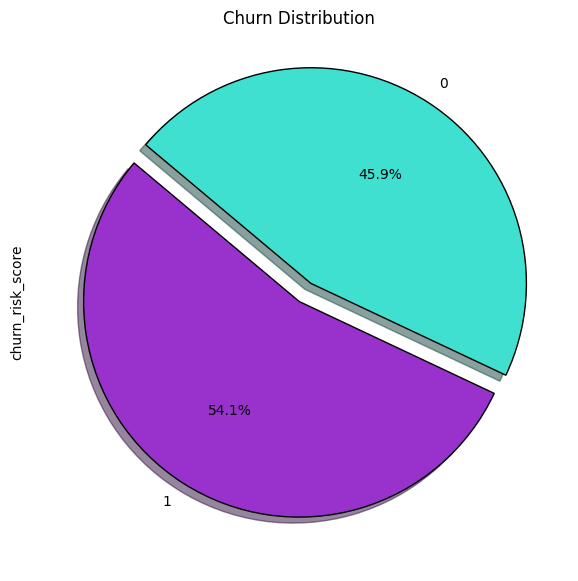

In [56]:
y = df['churn_risk_score']

print(f'Percentage of \033[1m"being churn"\033[0m: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} churn cases out of {len(df)})\nPercentage of \033[1m"NOT being churn"\033[0m: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} NOT churn cases out of {len(df)})')

explode = [0, 0.1]

df["churn_risk_score"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 explode=explode, 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['darkorchid', 'turquoise'], 
                                 startangle=140)
plt.title('Churn Distribution');

<Axes: >

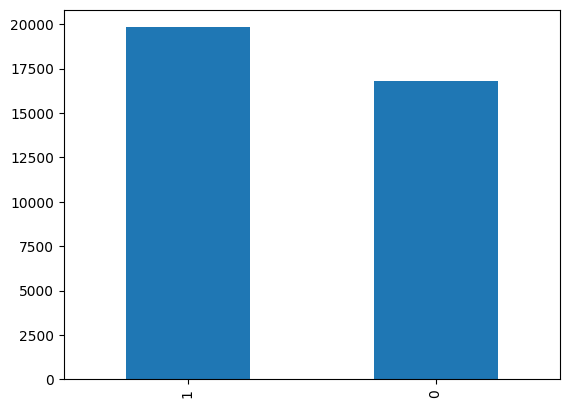

In [57]:
#plt.figure(figsize=(1, 1))
df['churn_risk_score'].value_counts().plot(kind='bar')

In [58]:
df[df['churn_risk_score']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
age,16819.00,37.01,15.93,10.00,23.00,37.00,51.00,64.00
days_since_last_login,16819.00,-40.26,225.35,-999.00,8.00,12.00,16.00,26.00
avg_time_spent,16819.00,283.99,330.82,0.00,62.48,169.52,367.79,3040.41
avg_transaction_value,16819.00,33876.27,23352.81,806.22,15858.44,30607.70,45149.74,99914.05
avg_frequency_login_days,16819.00,13.48,9.25,0.00,6.00,13.00,20.00,67.06
points_in_wallet,16819.00,682.51,275.59,0.00,708.38,749.45,784.28,2069.07
churn_risk_score,16819.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [59]:
df[df['churn_risk_score']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
age,19827.00,37.20,15.82,10.00,24.00,37.00,51.00,64.00
days_since_last_login,19827.00,-43.39,231.89,-999.00,8.00,12.00,16.00,26.00
avg_time_spent,19827.00,274.99,328.98,0.00,58.16,156.83,346.30,3235.58
avg_transaction_value,19827.00,25374.06,14260.32,800.46,12932.08,25394.02,37803.41,49997.69
avg_frequency_login_days,19827.00,15.65,9.54,0.00,8.00,16.00,23.00,73.06
points_in_wallet,19827.00,573.72,255.04,0.00,541.02,628.52,678.83,1816.93
churn_risk_score,19827.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


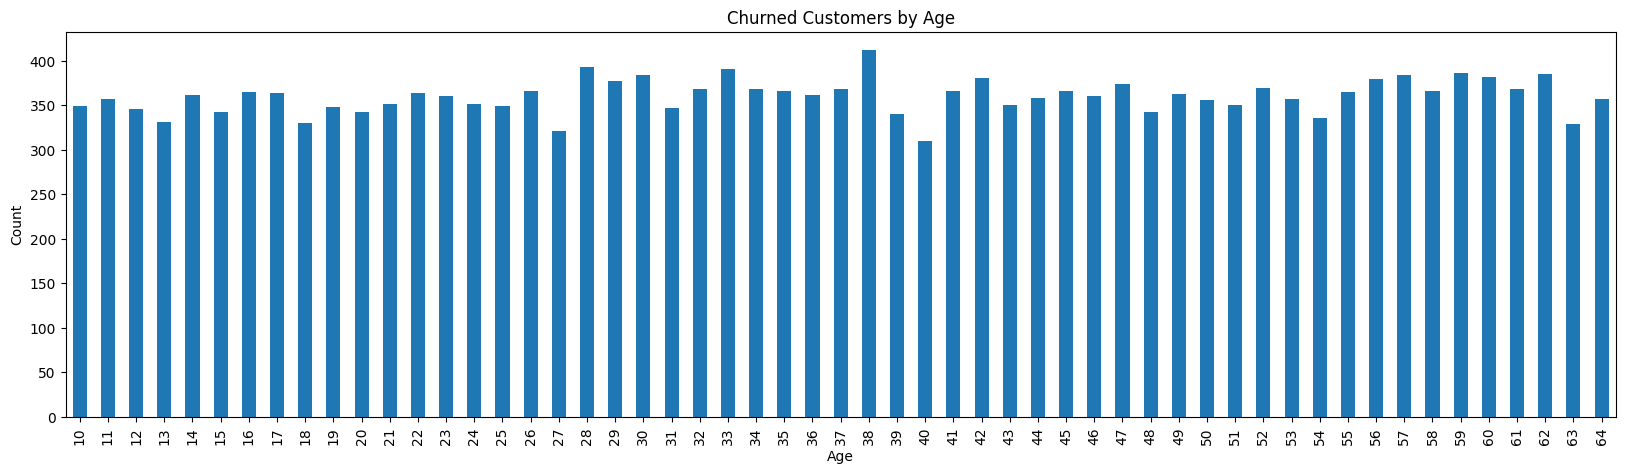

In [60]:
fig, ax = plt.subplots(figsize=(20, 5))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('age').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# show the plot
plt.show()

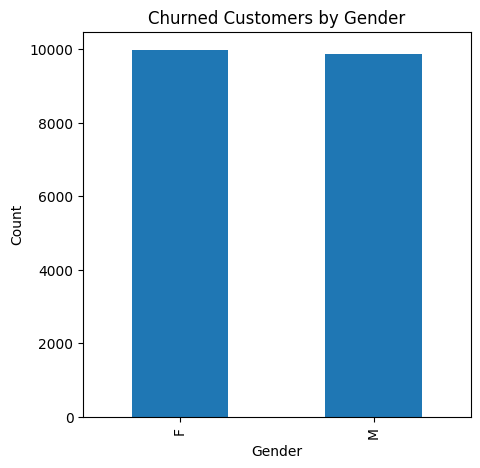

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('gender').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# show the plot
plt.show()

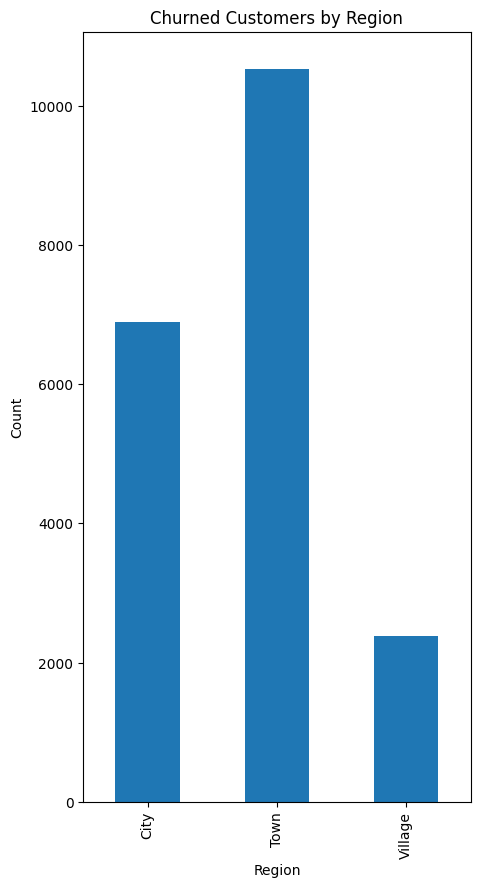

In [62]:
fig, ax = plt.subplots(figsize=(5, 10))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('region_category').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Count')

# show the plot
plt.show()

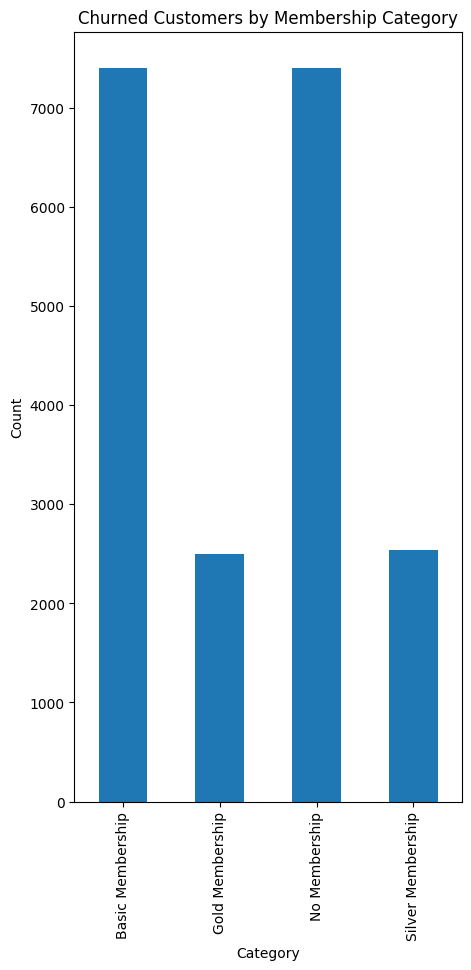

In [63]:
fig, ax = plt.subplots(figsize=(5, 10))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('membership_category').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Membership Category')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

# show the plot
plt.show()

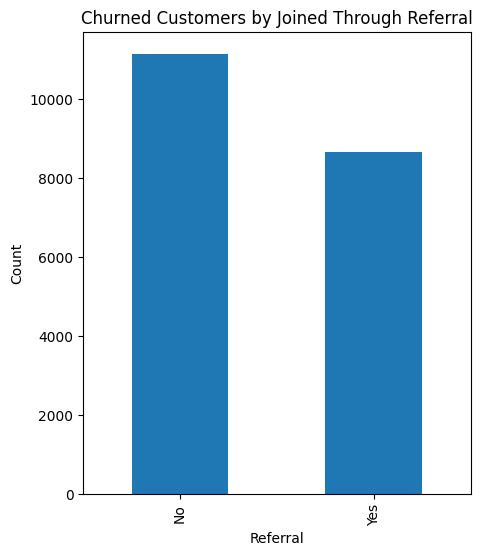

In [64]:
fig, ax = plt.subplots(figsize=(5, 6))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('joined_through_referral').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Joined Through Referral')
ax.set_xlabel('Referral')
ax.set_ylabel('Count')

# show the plot
plt.show()

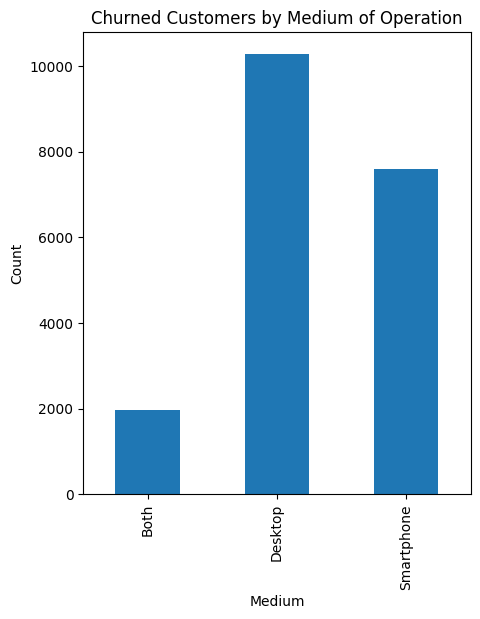

In [65]:
fig, ax = plt.subplots(figsize=(5, 6))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('medium_of_operation').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Medium of Operation')
ax.set_xlabel('Medium')
ax.set_ylabel('Count')

# show the plot
plt.show()

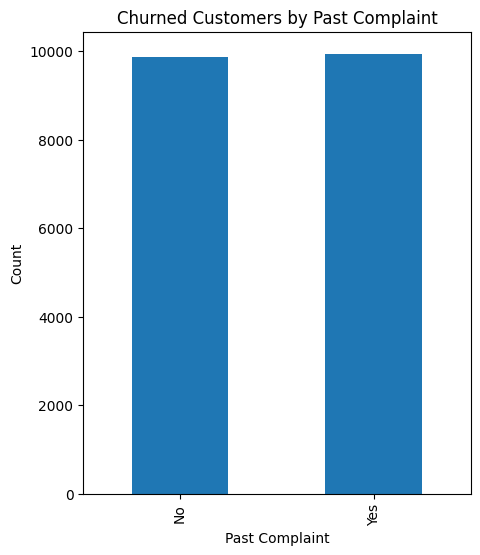

In [66]:
fig, ax = plt.subplots(figsize=(5, 6))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('past_complaint').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Past Complaint')
ax.set_xlabel('Past Complaint')
ax.set_ylabel('Count')

# show the plot
plt.show()

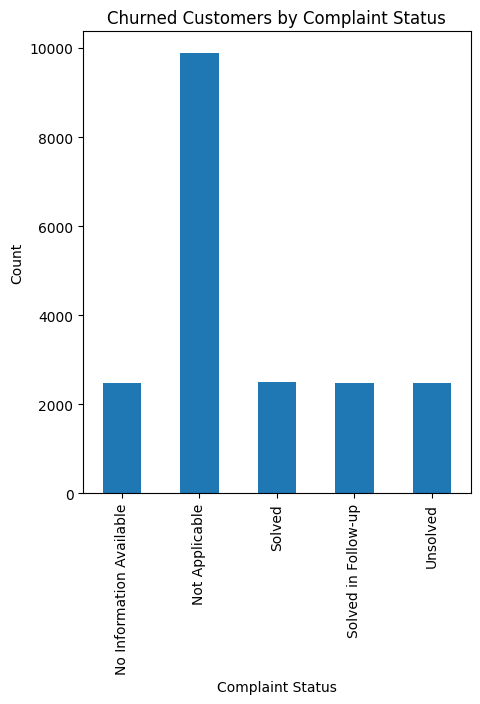

In [67]:
fig, ax = plt.subplots(figsize=(5, 6))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('complaint_status').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Complaint Status')
ax.set_xlabel('Complaint Status')
ax.set_ylabel('Count')

# show the plot
plt.show()

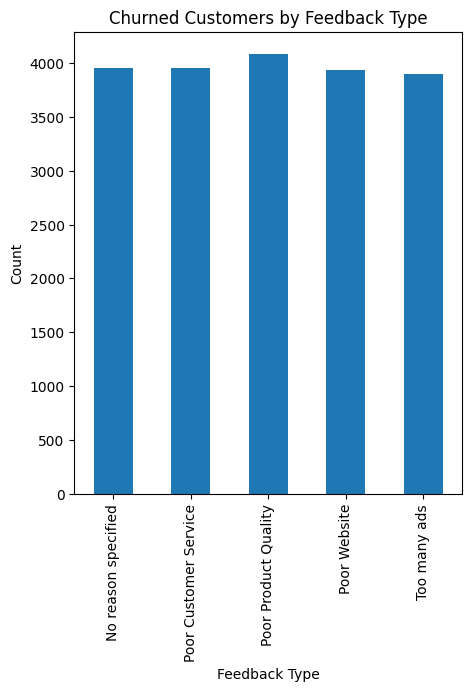

In [68]:
fig, ax = plt.subplots(figsize=(5, 6))

# filter the dataframe to only include churned customers
churned_df = df[df['churn_risk_score'] == 1]

# create the plot
churned_df.groupby('feedback').size().plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Churned Customers by Feedback Type')
ax.set_xlabel('Feedback Type')
ax.set_ylabel('Count')

# show the plot
plt.show()

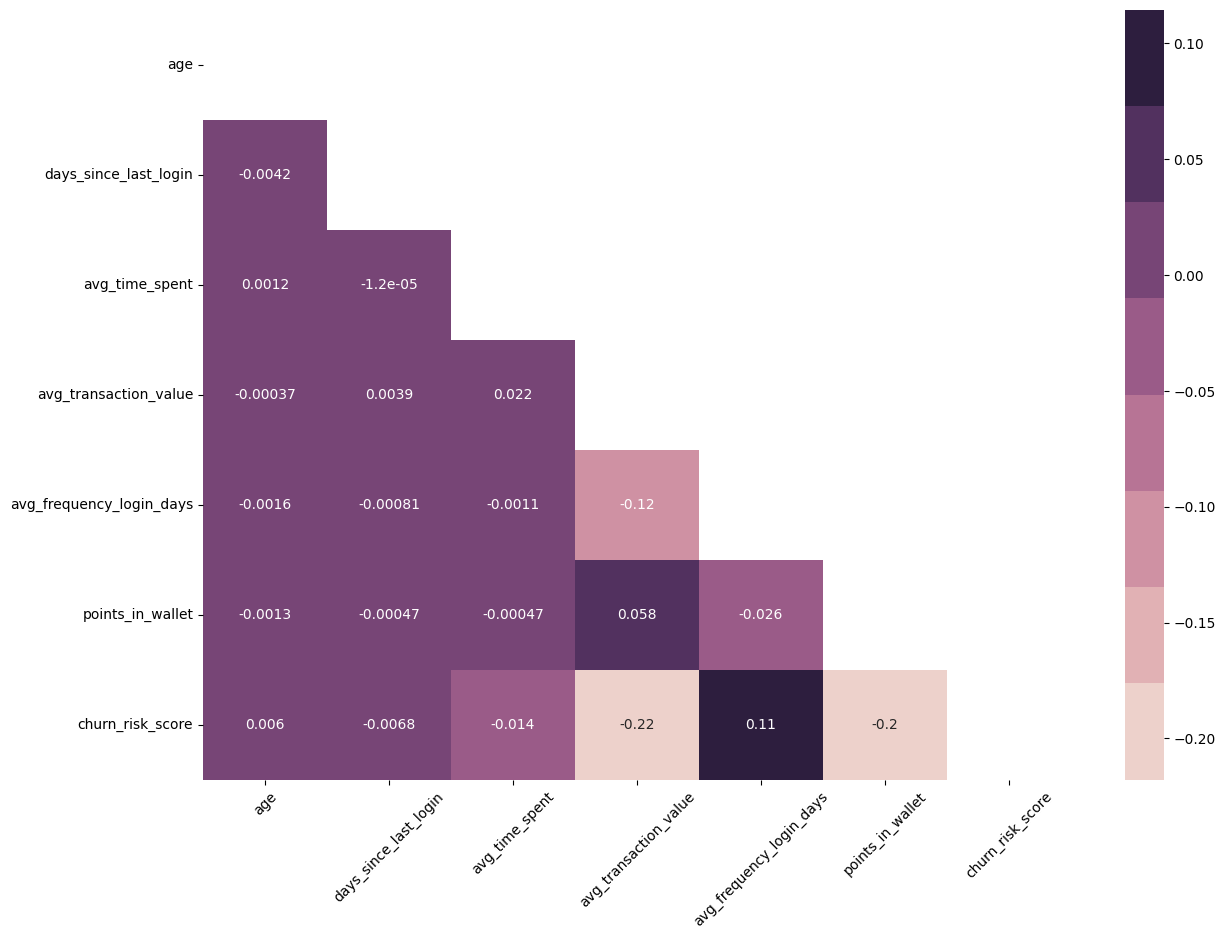

In [69]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

In [70]:
corr_matrix = df[['gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback','churn_risk_score']].phik_matrix()
print(corr_matrix)

interval columns not set, guessing: ['churn_risk_score']
                                gender  region_category  membership_category  \
gender                        1.000000         0.000000             0.000000   
region_category               0.000000         1.000000             0.030972   
membership_category           0.000000         0.030972             1.000000   
joined_through_referral       0.000000         0.000000             0.038142   
preferred_offer_types         0.000000         0.015505             0.059147   
medium_of_operation           0.000000         0.013026             0.037670   
internet_option               0.001440         0.000000             0.002723   
used_special_discount         0.000000         0.000000             0.003157   
offer_application_preference  0.000000         0.000000             0.016994   
past_complaint                0.009238         0.000000             0.007092   
complaint_status              0.002317         0.000000        

In [71]:
df2 = df.copy()

In [72]:
df2.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [73]:
df3 = df2.drop(columns=['user_id', 'age', 'gender', 'region_category', 
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 
       'avg_frequency_login_days', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status'])

In [74]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [75]:
multi = df3.iloc[:,[1,2]]
calc_vif(multi)

,variables,VIF
0,avg_transaction_value,2.523297
1,points_in_wallet,2.523297


In [76]:
df3

,membership_category,avg_transaction_value,points_in_wallet,feedback,churn_risk_score
0,No Membership,38604.69,627.48,Poor Website,1
1,Basic Membership,7665.66,575.97,Poor Customer Service,1
2,Silver Membership,37671.69,767.93,Too many ads,0
3,No Membership,15678.14,590.22,Too many ads,1
4,Silver Membership,8422.68,722.04,Poor Product Quality,0
...,...,...,...,...,...
37005,Gold Membership,29455.29,846.52,User Friendly Website,0
37006,Gold Membership,27038.47,835.98,Reasonable Price,0
37007,Gold Membership,39305.35,714.90,Poor Customer Service,0
37008,Gold Membership,46108.73,744.99,Poor Website,0


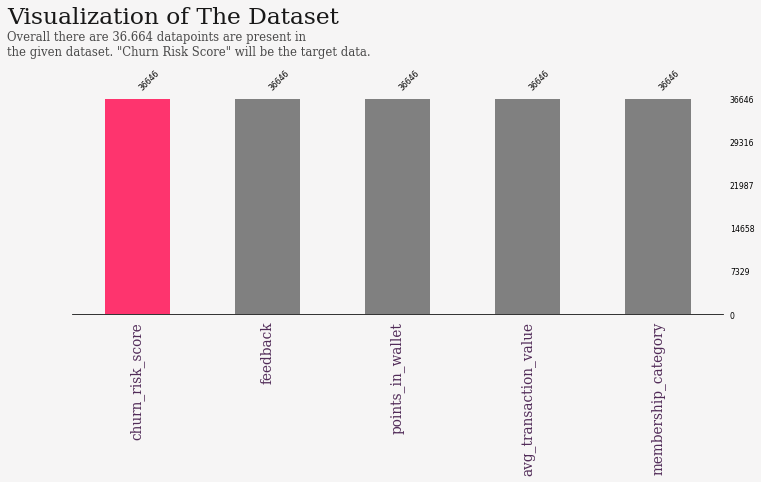

In [77]:
df3

color = ['#fe346e','grey','grey','grey','grey']
fig, ax = plt.subplots(figsize=(12, 4), dpi=70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

msno.bar(df3, sort='descending', 
         color=color, 
         ax=ax, fontsize=8,
         labels='off', filter='top')

ax.text(-1, 1.35, 'Visualization of The Dataset', {'font': 'Serif', 'size': 24, 'color': 'black'}, alpha=0.9)
ax.text(-1, 1.2, 'Overall there are 36.664 datapoints are present in \nthe given dataset. "Churn Risk Score" will be the target data.', {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', **{'font': 'Serif', 'size': 14, 'weight': 'normal', 'color': '#512b58'}, alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36646 entries, 0 to 37009
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   membership_category    36646 non-null  object 
 1   avg_transaction_value  36646 non-null  float64
 2   points_in_wallet       36646 non-null  float64
 3   feedback               36646 non-null  object 
 4   churn_risk_score       36646 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ MB


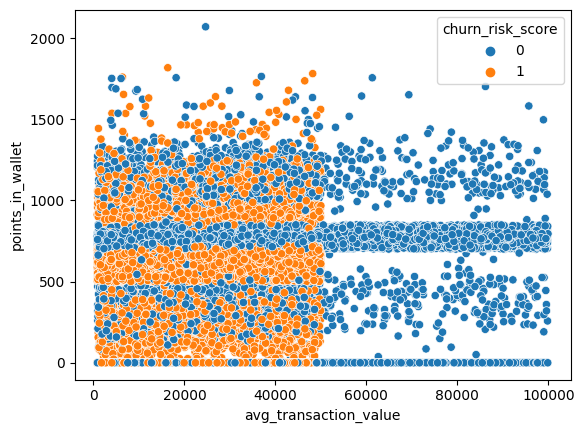

In [79]:
sns.scatterplot(data=df, x="avg_transaction_value", y="points_in_wallet", hue="churn_risk_score");

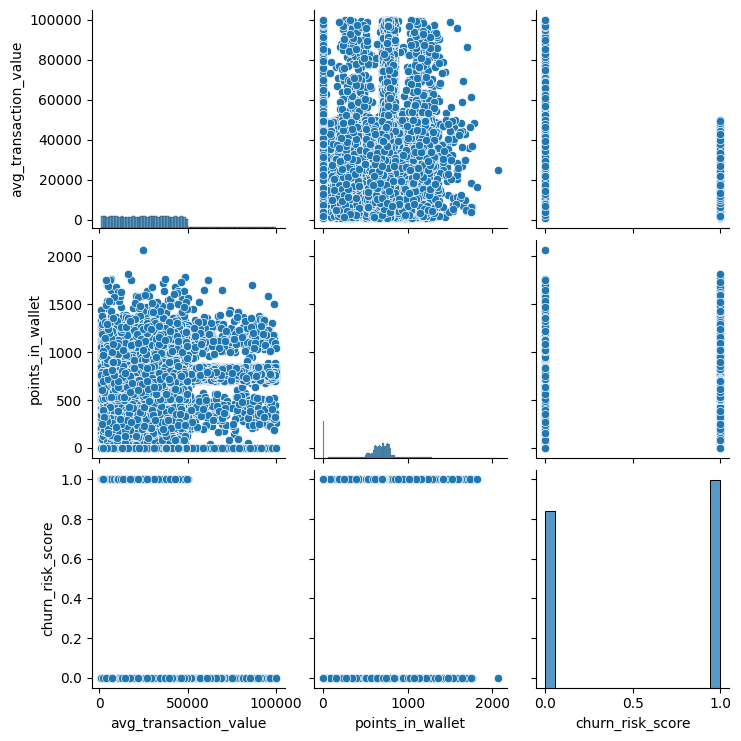

In [80]:
sns.pairplot(df3)

In [81]:
cat_cols= ['membership_category','feedback']
num_cols = ['avg_transaction_value','points_in_wallet']

In [82]:
fig = px.scatter_3d(df3, 
                    x='avg_transaction_value',
                    y='points_in_wallet',
                    z='feedback',
                    color='churn_risk_score')
fig.show();

In [83]:

# unique value in categorical columns

for i in df3[cat_cols]:
    print(i)
    print()
    print(df3[cat_cols][i].value_counts())
    print('■' * 60)

membership_category

Basic Membership       7648
No Membership          7622
Gold Membership        6732
Silver Membership      5926
Premium Membership     4416
Platinum Membership    4302
Name: membership_category, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
feedback

Poor Product Quality        6294
No reason specified         6226
Too many ads                6221
Poor Website                6216
Poor Customer Service       6181
Reasonable Price            1408
User Friendly Website       1381
Products always in Stock    1368
Quality Customer Care       1351
Name: feedback, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


In [84]:
df3[num_cols].apply(lambda x: round(x.skew(), 3))

avg_transaction_value    1.010
points_in_wallet        -0.775
dtype: float64

In [85]:
# outlier detection
Q1 = df3['avg_transaction_value'].quantile(.25)
Q3 = df3['avg_transaction_value'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df3[(df3['avg_transaction_value'] <= lower) | (df3['avg_transaction_value'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  3.0562680783714455 %
upper:  80884.34125
lower:  -25846.06875


In [86]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['avg_transaction_value'])

df4 = wins.fit_transform(df3)
df4

,membership_category,avg_transaction_value,points_in_wallet,feedback,churn_risk_score
0,No Membership,38604.69,627.48,Poor Website,1
1,Basic Membership,7665.66,575.97,Poor Customer Service,1
2,Silver Membership,37671.69,767.93,Too many ads,0
3,No Membership,15678.14,590.22,Too many ads,1
4,Silver Membership,8422.68,722.04,Poor Product Quality,0
...,...,...,...,...,...
37005,Gold Membership,29455.29,846.52,User Friendly Website,0
37006,Gold Membership,27038.47,835.98,Reasonable Price,0
37007,Gold Membership,39305.35,714.90,Poor Customer Service,0
37008,Gold Membership,46108.73,744.99,Poor Website,0


In [87]:
df4.shape

(36646, 5)

# Feature Engineering

In [88]:
# scaling numerical data
scaler = MinMaxScaler()
df4_num_scaled = pd.DataFrame(scaler.fit_transform(df4[num_cols]))

# encoding categorical data
encode = OrdinalEncoder()
df4_cat_encoded = pd.DataFrame(encode.fit_transform(df4[cat_cols]))

# concatenate numerical and categorical
df5 = pd.DataFrame(np.concatenate([df4_num_scaled, df4_cat_encoded, df4[['churn_risk_score']]], axis=1), columns=df4[num_cols].columns.tolist()+df4[cat_cols].columns.tolist()+['churn_risk_score']).round(2)

In [89]:
df5

,avg_transaction_value,points_in_wallet,membership_category,feedback,churn_risk_score
0,0.38,0.30,2.0,3.0,1.0
1,0.07,0.28,0.0,1.0,1.0
2,0.37,0.37,5.0,7.0,0.0
3,0.15,0.29,2.0,7.0,1.0
4,0.08,0.35,5.0,2.0,0.0
...,...,...,...,...,...
36641,0.29,0.41,1.0,8.0,0.0
36642,0.26,0.40,1.0,6.0,0.0
36643,0.39,0.35,1.0,1.0,0.0
36644,0.46,0.36,1.0,3.0,0.0


In [90]:
examples= df4.drop('churn_risk_score',axis=1)
target= df4['churn_risk_score']

In [91]:
examples

,membership_category,avg_transaction_value,points_in_wallet,feedback
0,No Membership,38604.69,627.48,Poor Website
1,Basic Membership,7665.66,575.97,Poor Customer Service
2,Silver Membership,37671.69,767.93,Too many ads
3,No Membership,15678.14,590.22,Too many ads
4,Silver Membership,8422.68,722.04,Poor Product Quality
...,...,...,...,...
37005,Gold Membership,29455.29,846.52,User Friendly Website
37006,Gold Membership,27038.47,835.98,Reasonable Price
37007,Gold Membership,39305.35,714.90,Poor Customer Service
37008,Gold Membership,46108.73,744.99,Poor Website


In [92]:
target

0        1
1        1
2        0
3        1
4        0
        ..
37005    0
37006    0
37007    0
37008    0
37009    1
Name: churn_risk_score, Length: 36646, dtype: int64

In [93]:
num_cols

['avg_transaction_value', 'points_in_wallet']

In [94]:
cat_cols

['membership_category', 'feedback']

In [95]:
 x_train_full, x_test,  y_train_full, y_test = train_test_split(examples,
                                                                target,
                                                                shuffle=True, test_size=0.2,
                                                                stratify= target
                                                                )

 x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                   y_train_full,
                                                   shuffle=True, test_size=0.2, stratify= y_train_full)

In [96]:
x_train_full

,membership_category,avg_transaction_value,points_in_wallet,feedback
29947,Platinum Membership,8443.99,740.620000,Poor Product Quality
18570,Premium Membership,21276.75,499.666882,Products always in Stock
9098,Platinum Membership,33215.54,702.400000,Too many ads
13388,No Membership,37803.35,1130.673872,Poor Product Quality
8081,Premium Membership,24071.38,393.491850,Poor Customer Service
...,...,...,...,...
13536,Premium Membership,40155.39,705.370000,Reasonable Price
30188,Platinum Membership,23812.06,741.430000,Poor Website
26161,Silver Membership,19343.57,747.900000,Poor Website
32532,Basic Membership,47206.84,529.540000,Poor Website


In [97]:
x_train.shape

(23452, 4)

In [98]:
x_test.shape

(7330, 4)

In [99]:
#pipeline
num_features_skew=['avg_transaction_value']

num_pipeline_skew= Pipeline([
    ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
    ('scaler', MinMaxScaler())
])

cat_pipeline= Pipeline([
    ('ordinal', OrdinalEncoder())
])

In [100]:
preproc_pipeline= ColumnTransformer(
    [
        ('skew', num_pipeline_skew, num_features_skew),
        ('cat', cat_pipeline,['membership_category','feedback'])
    ],
    remainder='passthrough',
    verbose=True
)

In [101]:
X_train= preproc_pipeline.fit_transform(x_train_full)
X_test= preproc_pipeline.transform(x_test)
X_val = preproc_pipeline.transform(x_val)

[ColumnTransformer] .......... (1 of 3) Processing skew, total=   0.0s
[ColumnTransformer] ........... (2 of 3) Processing cat, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


In [102]:
X_train

array([[7.71598230e-02, 3.00000000e+00, 2.00000000e+00, 7.40620000e+02],
       [2.06703828e-01, 4.00000000e+00, 4.00000000e+00, 4.99666882e+02],
       [3.27223395e-01, 3.00000000e+00, 7.00000000e+00, 7.02400000e+02],
       ...,
       [1.87188784e-01, 5.00000000e+00, 3.00000000e+00, 7.47900000e+02],
       [4.68462617e-01, 0.00000000e+00, 3.00000000e+00, 5.29540000e+02],
       [6.21216158e-02, 5.00000000e+00, 2.00000000e+00, 6.17060000e+02]])

In [103]:
X_test

array([[1.48809607e-01, 5.00000000e+00, 2.00000000e+00, 1.15995019e+03],
       [3.37469707e-01, 0.00000000e+00, 3.00000000e+00, 6.90210000e+02],
       [1.05262302e-01, 1.00000000e+00, 3.00000000e+00, 7.93100000e+02],
       ...,
       [7.06632206e-02, 0.00000000e+00, 2.00000000e+00, 1.07908701e+03],
       [2.92224156e-01, 0.00000000e+00, 7.00000000e+00, 6.54160000e+02],
       [3.00059226e-01, 1.00000000e+00, 0.00000000e+00, 7.10970000e+02]])

In [104]:
x_train_full

,membership_category,avg_transaction_value,points_in_wallet,feedback
29947,Platinum Membership,8443.99,740.620000,Poor Product Quality
18570,Premium Membership,21276.75,499.666882,Products always in Stock
9098,Platinum Membership,33215.54,702.400000,Too many ads
13388,No Membership,37803.35,1130.673872,Poor Product Quality
8081,Premium Membership,24071.38,393.491850,Poor Customer Service
...,...,...,...,...
13536,Premium Membership,40155.39,705.370000,Reasonable Price
30188,Platinum Membership,23812.06,741.430000,Poor Website
26161,Silver Membership,19343.57,747.900000,Poor Website
32532,Basic Membership,47206.84,529.540000,Poor Website


In [105]:
x_test

,membership_category,avg_transaction_value,points_in_wallet,feedback
1590,Silver Membership,15541.69,1159.950190,Poor Product Quality
18008,Basic Membership,34230.55,690.210000,Poor Website
12724,Gold Membership,11227.85,793.100000,Poor Website
30788,Gold Membership,37274.94,767.090000,User Friendly Website
13805,Silver Membership,1384.51,700.430000,Poor Product Quality
...,...,...,...,...
34916,Gold Membership,41663.48,776.390000,No reason specified
33460,No Membership,9702.88,683.340000,Poor Customer Service
36976,Basic Membership,7800.43,1079.087009,Poor Product Quality
8470,Basic Membership,29748.48,654.160000,Too many ads


In [106]:
x_val

,membership_category,avg_transaction_value,points_in_wallet,feedback
10625,No Membership,14241.88,687.76,Poor Product Quality
19465,Platinum Membership,8656.06,727.32,Poor Customer Service
35776,Platinum Membership,54420.14,0.00,User Friendly Website
10409,Basic Membership,9878.88,0.00,Poor Product Quality
8986,Premium Membership,50663.64,750.03,Quality Customer Care
...,...,...,...,...
19104,Platinum Membership,92635.09,0.00,Reasonable Price
26962,Platinum Membership,10374.67,710.15,Poor Customer Service
13212,Gold Membership,14423.03,699.40,Poor Product Quality
28624,No Membership,49082.56,605.95,Poor Customer Service


In [107]:
#stopper

# Model Implementation

# Model-Sequential

In [108]:
X_train.shape[1:]

(4,)

In [109]:
X_train

array([[7.71598230e-02, 3.00000000e+00, 2.00000000e+00, 7.40620000e+02],
       [2.06703828e-01, 4.00000000e+00, 4.00000000e+00, 4.99666882e+02],
       [3.27223395e-01, 3.00000000e+00, 7.00000000e+00, 7.02400000e+02],
       ...,
       [1.87188784e-01, 5.00000000e+00, 3.00000000e+00, 7.47900000e+02],
       [4.68462617e-01, 0.00000000e+00, 3.00000000e+00, 5.29540000e+02],
       [6.21216158e-02, 5.00000000e+00, 2.00000000e+00, 6.17060000e+02]])

In [110]:
ann = Sequential()
# ann.add(tf.keras.Input(shape=(X_train.shape[1:])))
ann.add(Dense(units=30, activation='relu',input_shape=(X_train.shape[1:])))
ann.add(Dense(units=1,activation='sigmoid')) #sesuaikan dengan target atau jumlah class

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

In [112]:
hidden1 = ann.layers[1]
hidden1.name

'dense_1'

In [113]:
weights, biases = hidden1.get_weights()
# weights

In [114]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


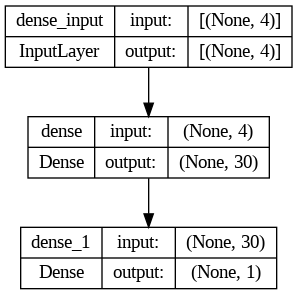

In [115]:
tf.keras.utils.plot_model(ann, show_shapes=True)

In [116]:
X_train.shape

(29316, 4)

In [117]:
#training model
batch=32

history_ann_seq= ann.fit(X_train, y_train_full,
                        #validation_data= (X_val,y_val),
                         validation_split=0.2,
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks1
                         )

Epoch 1/100
733/733 [==============================] - 4s 4ms/step - loss: 6.9494 - accuracy: 0.5983 - val_loss: 0.6293 - val_accuracy: 0.6634
Epoch 2/100
733/733 [==============================] - 2s 3ms/step - loss: 0.6338 - accuracy: 0.6553 - val_loss: 0.6190 - val_accuracy: 0.6901
Epoch 3/100
733/733 [==============================] - 2s 2ms/step - loss: 0.6247 - accuracy: 0.6692 - val_loss: 0.5842 - val_accuracy: 0.7299
Epoch 4/100
733/733 [==============================] - 2s 2ms/step - loss: 0.5968 - accuracy: 0.6994 - val_loss: 0.6178 - val_accuracy: 0.6642
Epoch 5/100
733/733 [==============================] - 2s 2ms/step - loss: 0.5854 - accuracy: 0.7107 - val_loss: 0.5708 - val_accuracy: 0.7309
Epoch 6/100
733/733 [==============================] - 2s 2ms/step - loss: 0.5790 - accuracy: 0.7157 - val_loss: 0.5649 - val_accuracy: 0.7352
Epoch 7/100
733/733 [==============================] - 2s 2ms/step - loss: 0.5706 - accuracy: 0.7191 - val_loss: 0.5511 - val_accuracy: 0.7601

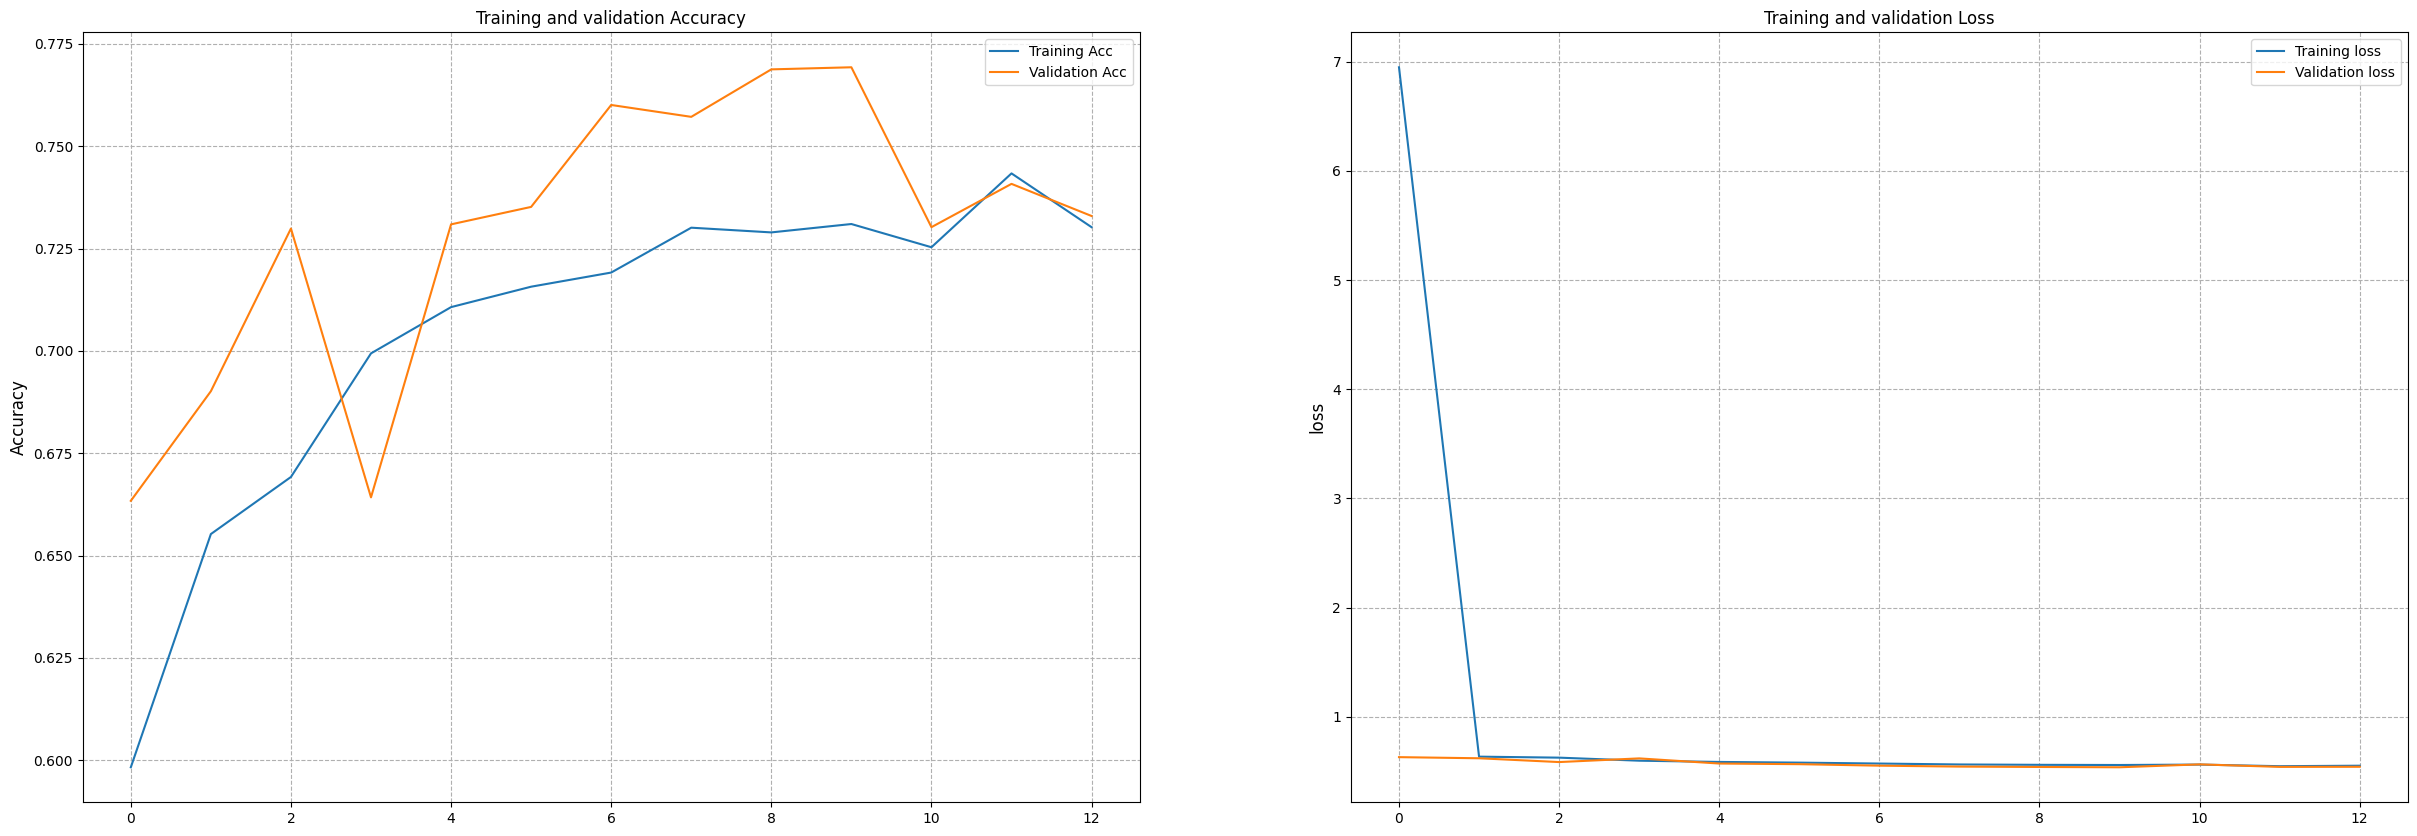

In [118]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann_seq.history['accuracy'], label='Training Acc')
plt.plot(history_ann_seq.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann_seq.history['loss'], label='Training loss')
plt.plot(history_ann_seq.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [119]:
test_results= ann.evaluate(X_test,y_test, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

230/230 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7760
Test loss: 0.5213
Test Accuracy: 0.7760


In [120]:
y_pred= ann.predict(X_test)
y_pred_th05= tf.where(y_pred >= 0.5, 1,0)
y_pred_th04= (y_pred > 0.4)
y_pred_th03= (y_pred > 0.3)

print(f'model ann threshold 0.5, recall score: {recall_score(y_test, y_pred_th05):.4f}')
print(f'model ann threshold 0.4, recall score: {recall_score(y_test, y_pred_th04):.4f}')
print(f'model ann threshold 0.3, recall score: {recall_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model ann threshold 0.5, accuracy score: {accuracy_score(y_test, y_pred_th05):.4f}')
print(f'model ann threshold 0.4, accuracy score: {accuracy_score(y_test, y_pred_th04):.4f}')
print(f'model ann threshold 0.3, accuracy score: {accuracy_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model ann threshold 0.5, precision score: {precision_score(y_test, y_pred_th05):.4f}')
print(f'model ann threshold 0.4, precision score: {precision_score(y_test, y_pred_th04):.4f}')
print(f'model ann threshold 0.3, precision score: {precision_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model ann threshold 0.5, f1 score: {f1_score(y_test, y_pred_th05):.4f}')
print(f'model ann threshold 0.4, f1 score: {f1_score(y_test, y_pred_th04):.4f}')
print(f'model ann threshold 0.3, f1 score: {f1_score(y_test, y_pred_th03):.4f}')

230/230 [==============================] - 1s 2ms/step
model ann threshold 0.5, recall score: 0.7900
model ann threshold 0.4, recall score: 0.8570
model ann threshold 0.3, recall score: 0.8863
-------
model ann threshold 0.5, accuracy score: 0.7760
model ann threshold 0.4, accuracy score: 0.7572
model ann threshold 0.3, accuracy score: 0.7074
-------
model ann threshold 0.5, precision score: 0.7948
model ann threshold 0.4, precision score: 0.7370
model ann threshold 0.3, precision score: 0.6748
-------
model ann threshold 0.5, f1 score: 0.7924
model ann threshold 0.4, f1 score: 0.7925
model ann threshold 0.3, f1 score: 0.7662


In [121]:
confusion_matrix(y_test, y_pred_th05)

array([[2555,  809],
       [ 833, 3133]])

In [122]:
confusion_matrix(y_test, y_pred_th05).ravel()

array([2555,  809,  833, 3133])

In [123]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_th05).ravel()
print(fn)
print(fp)

833
809


In [124]:
print(classification_report(y_test, y_pred_th05, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79      3966
           0       0.75      0.76      0.76      3364

    accuracy                           0.78      7330
   macro avg       0.77      0.77      0.77      7330
weighted avg       0.78      0.78      0.78      7330




[[2555  809]
 [ 833 3133]]


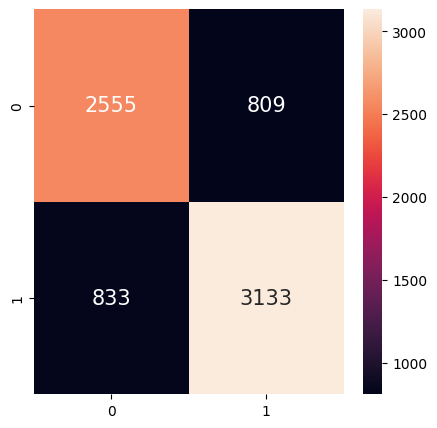

In [125]:
plt.subplots(figsize=(5,5))
cf_matrix = confusion_matrix(y_test, y_pred_th05)
print(f'\n{cf_matrix}')
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, 
            # cmap = cmap1, 
            annot = True, 
            annot_kws = {'size':15}, fmt='g');

# Model-Functional

In [126]:
input_layer= tf.keras.Input(shape=(X_train.shape[1:]),name='input_layer')

hidden_1= Dense(30, activation='relu', name='hidden_1')(input_layer)
hidden_2= Dense(30, activation='relu', name='hidden_2')(hidden_1)
hidden_3= Dense(10, activation='relu', name='hidden_3')(hidden_2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model_func= Model(inputs=input_layer,
                  outputs=output_layer)

model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

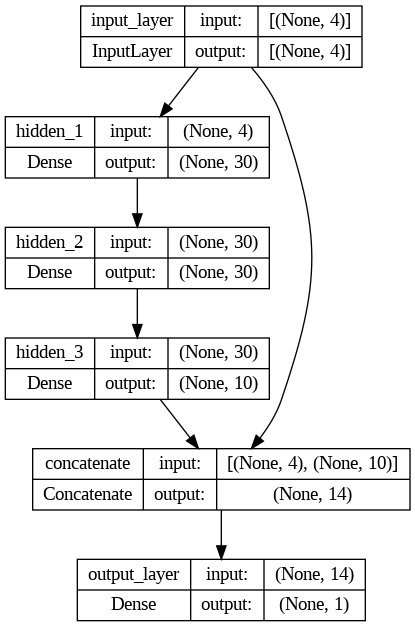

In [127]:
tf.keras.utils.plot_model(model_func, show_shapes=True)

In [128]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best_func.hdf5', monitor='val_loss', save_best_only=True)
]

In [129]:
#training model
batch=32

history_ann_func= model_func.fit(X_train, y_train_full,
                         validation_data= (X_val,y_val),
                         validation_split=0.2,
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks2
                         )

Epoch 1/100
917/917 [==============================] - 4s 3ms/step - loss: 1.1791 - accuracy: 0.6082 - val_loss: 0.7020 - val_accuracy: 0.5718
Epoch 2/100
917/917 [==============================] - 2s 3ms/step - loss: 0.6517 - accuracy: 0.6619 - val_loss: 0.6510 - val_accuracy: 0.6540
Epoch 3/100
917/917 [==============================] - 2s 3ms/step - loss: 0.6559 - accuracy: 0.6738 - val_loss: 0.9706 - val_accuracy: 0.5619
Epoch 4/100
917/917 [==============================] - 2s 2ms/step - loss: 0.6174 - accuracy: 0.6929 - val_loss: 1.4093 - val_accuracy: 0.5631
Epoch 5/100
917/917 [==============================] - 3s 4ms/step - loss: 0.6054 - accuracy: 0.7057 - val_loss: 0.6150 - val_accuracy: 0.6490
Epoch 6/100
917/917 [==============================] - 3s 3ms/step - loss: 0.5968 - accuracy: 0.7099 - val_loss: 0.5402 - val_accuracy: 0.7292
Epoch 7/100
917/917 [==============================] - 2s 2ms/step - loss: 0.5687 - accuracy: 0.7233 - val_loss: 0.5968 - val_accuracy: 0.7009

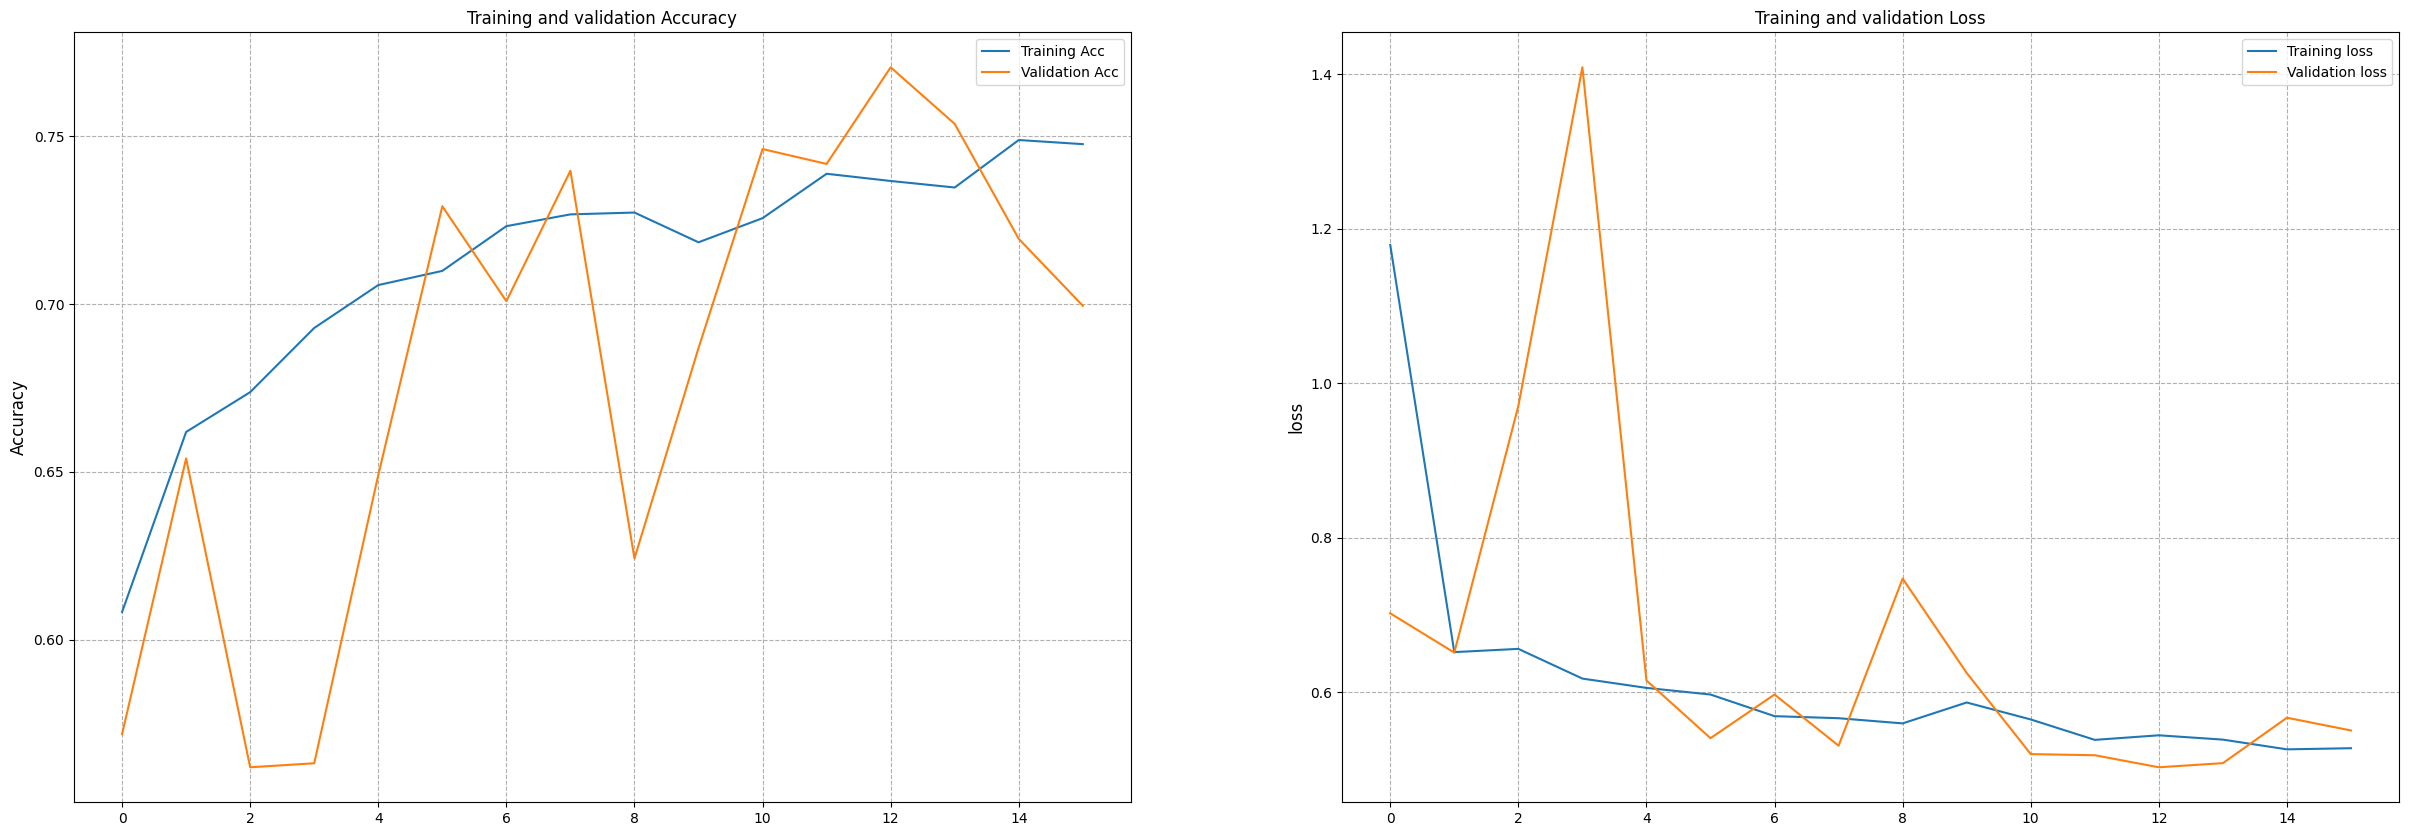

In [130]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann_func.history['accuracy'], label='Training Acc')
plt.plot(history_ann_func.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann_func.history['loss'], label='Training loss')
plt.plot(history_ann_func.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [131]:
test_results= model_func.evaluate(X_test,y_test, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

230/230 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7726
Test loss: 0.4971
Test Accuracy: 0.7726


In [132]:
y_pred= model_func.predict(X_test)
y_pred_th05= tf.where(y_pred >= 0.5, 1,0)
y_pred_th04= (y_pred > 0.4)
y_pred_th03= (y_pred > 0.3)

print(f'model functional treshold 0.5, recall score: {recall_score(y_test, y_pred_th05):.4f}')
print(f'model functional treshold 0.4, recall score: {recall_score(y_test, y_pred_th04):.4f}')
print(f'model functional treshold 0.3, recall score: {recall_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model functional treshold 0.5, accuracy score: {accuracy_score(y_test, y_pred_th05):.4f}')
print(f'model functional treshold 0.4, accuracy score: {accuracy_score(y_test, y_pred_th04):.4f}')
print(f'model functional treshold 0.3, accuracy score: {accuracy_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model functional treshold 0.5, precision score: {precision_score(y_test, y_pred_th05):.4f}')
print(f'model functional treshold 0.4, precision score: {precision_score(y_test, y_pred_th04):.4f}')
print(f'model functional treshold 0.3, precision score: {precision_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model functional treshold 0.5, f1 score: {f1_score(y_test, y_pred_th05):.4f}')
print(f'model functional treshold 0.4, f1 score: {f1_score(y_test, y_pred_th04):.4f}')
print(f'model functional treshold 0.3, f1 score: {f1_score(y_test, y_pred_th03):.4f}')

230/230 [==============================] - 0s 1ms/step
model functional treshold 0.5, recall score: 0.8374
model functional treshold 0.4, recall score: 0.8759
model functional treshold 0.3, recall score: 0.9165
-------
model functional treshold 0.5, accuracy score: 0.7726
model functional treshold 0.4, accuracy score: 0.7431
model functional treshold 0.3, accuracy score: 0.6913
-------
model functional treshold 0.5, precision score: 0.7647
model functional treshold 0.4, precision score: 0.7141
model functional treshold 0.3, precision score: 0.6530
-------
model functional treshold 0.5, f1 score: 0.7994
model functional treshold 0.4, f1 score: 0.7868
model functional treshold 0.3, f1 score: 0.7626


In [161]:
confusion_matrix(y_test, y_pred_th05)

array([[2891,  473],
       [ 411, 3555]])

In [162]:
confusion_matrix(y_test, y_pred_th05).ravel()

array([2891,  473,  411, 3555])

In [163]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_th05).ravel()
print(fn)
print(fp)

411
473


In [164]:
print(classification_report(y_test, y_pred_th05, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.88      0.90      0.89      3966
           0       0.88      0.86      0.87      3364

    accuracy                           0.88      7330
   macro avg       0.88      0.88      0.88      7330
weighted avg       0.88      0.88      0.88      7330




[[2891  473]
 [ 411 3555]]


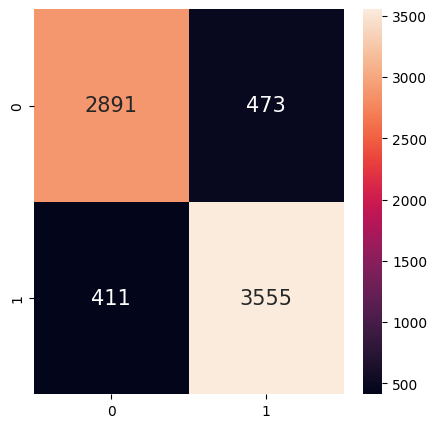

In [165]:
plt.subplots(figsize=(5,5))
cf_matrix = confusion_matrix(y_test, y_pred_th05)
print(f'\n{cf_matrix}')
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, 
            # cmap = cmap1, 
            annot = True, 
            annot_kws = {'size':15}, fmt='g');

## Model-Sequential(Tuning)

In [138]:
ann2 = Sequential()
# ann.add(tf.keras.Input(shape=(X_train.shape[1:])))
ann2.add(Dense(units=32, activation='relu',input_shape=(X_train.shape[1:])))
ann2.add(BatchNormalization())
ann2.add(Dense(20, activation='relu', input_dim=10))
ann2.add(BatchNormalization())
ann2.add(Dense(units=1,activation='sigmoid'))

ann2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
history_ann_seq2=ann2.fit(X_train, y_train_full, 
                # validation_data=(X_val_new,y_val), 
                validation_split = 0.2,
                batch_size = 32, 
                epochs = 100,
                callbacks= callbacks1,
                # steps_per_epoch= ((len(X_train)/batch)) #kalau x_train di pisah sama val di awal
                )

Epoch 1/100
733/733 [==============================] - 4s 3ms/step - loss: 0.5044 - accuracy: 0.7753 - val_loss: 0.5524 - val_accuracy: 0.7246
Epoch 2/100
733/733 [==============================] - 2s 3ms/step - loss: 0.4337 - accuracy: 0.8066 - val_loss: 0.4133 - val_accuracy: 0.8298
Epoch 3/100
733/733 [==============================] - 2s 3ms/step - loss: 0.4190 - accuracy: 0.8170 - val_loss: 0.7438 - val_accuracy: 0.6768
Epoch 4/100
733/733 [==============================] - 4s 5ms/step - loss: 0.4147 - accuracy: 0.8215 - val_loss: 1.1075 - val_accuracy: 0.5650
Epoch 5/100
733/733 [==============================] - 2s 3ms/step - loss: 0.4029 - accuracy: 0.8269 - val_loss: 0.5488 - val_accuracy: 0.7700


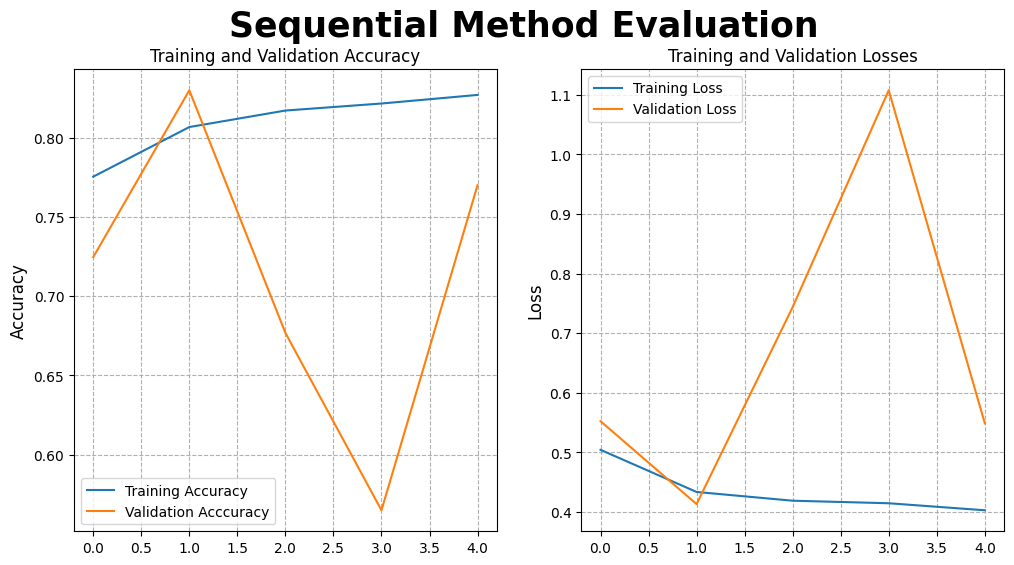

In [140]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_ann_seq2.history['accuracy'],label="Training Accuracy")
plt.plot(history_ann_seq2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_ann_seq2.history['loss'], label="Training Loss")
plt.plot(history_ann_seq2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [141]:
test_results= ann2.evaluate(X_test,y_test, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

230/230 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8338
Test loss: 0.3988
Test Accuracy: 0.8338


In [142]:
y_pred= ann2.predict(X_test)
y_pred_th05= tf.where(y_pred >= 0.5, 1,0)
y_pred_th04= (y_pred > 0.4)
y_pred_th03= (y_pred > 0.3)

print(f'model sequential treshold 0.5, recall score: {recall_score(y_test, y_pred_th05):.4f}')
print(f'model sequential treshold 0.4, recall score: {recall_score(y_test, y_pred_th04):.4f}')
print(f'model sequential treshold 0.3, recall score: {recall_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model sequential treshold 0.5, accuracy score: {accuracy_score(y_test, y_pred_th05):.4f}')
print(f'model sequential treshold 0.4, accuracy score: {accuracy_score(y_test, y_pred_th04):.4f}')
print(f'model sequential treshold 0.3, accuracy score: {accuracy_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model sequential treshold 0.5, precision score: {precision_score(y_test, y_pred_th05):.4f}')
print(f'model sequential treshold 0.4, precision score: {precision_score(y_test, y_pred_th04):.4f}')
print(f'model sequential treshold 0.3, precision score: {precision_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model sequential treshold 0.5, f1 score: {f1_score(y_test, y_pred_th05):.4f}')
print(f'model sequential treshold 0.4, f1 score: {f1_score(y_test, y_pred_th04):.4f}')
print(f'model sequential treshold 0.3, f1 score: {f1_score(y_test, y_pred_th03):.4f}')

230/230 [==============================] - 0s 1ms/step
model sequential treshold 0.5, recall score: 0.8843
model sequential treshold 0.4, recall score: 0.9304
model sequential treshold 0.3, recall score: 0.9609
-------
model sequential treshold 0.5, accuracy score: 0.8338
model sequential treshold 0.4, accuracy score: 0.8141
model sequential treshold 0.3, accuracy score: 0.7786
-------
model sequential treshold 0.5, precision score: 0.8221
model sequential treshold 0.4, precision score: 0.7725
model sequential treshold 0.3, precision score: 0.7219
-------
model sequential treshold 0.5, f1 score: 0.8520
model sequential treshold 0.4, f1 score: 0.8441
model sequential treshold 0.3, f1 score: 0.8244


In [160]:
confusion_matrix(y_test, y_pred_th05)

array([[2891,  473],
       [ 411, 3555]])

In [144]:
confusion_matrix(y_test, y_pred_th05).ravel()

array([2277, 1087,  276, 3690])

In [145]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_th05).ravel()
print(fn)
print(fp)

276
1087


In [146]:
print(classification_report(y_test, y_pred_th05, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.77      0.93      0.84      3966
           0       0.89      0.68      0.77      3364

    accuracy                           0.81      7330
   macro avg       0.83      0.80      0.81      7330
weighted avg       0.83      0.81      0.81      7330




[[2891  473]
 [ 411 3555]]


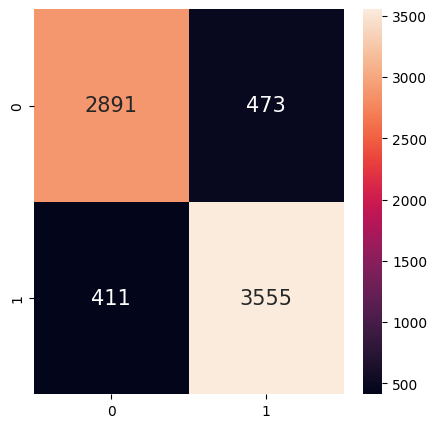

In [166]:
plt.subplots(figsize=(5,5))
cf_matrix = confusion_matrix(y_test, y_pred_th05)
print(f'\n{cf_matrix}')
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, 
            # cmap = cmap1, 
            annot = True, 
            annot_kws = {'size':15}, fmt='g');

## Model-Functional(Tuning)

In [148]:
input_layer= tf.keras.Input(shape=(X_train.shape[1:]),name='input_layer')

hidden_1= Dense(60, activation='relu', name='hidden_1')(input_layer)
hidden_1= BatchNormalization()(hidden_1)
hidden_2= Dense(60, activation='relu', name='hidden_2')(hidden_1)
hidden_2= BatchNormalization()(hidden_2)
hidden_3= Dense(30, activation='relu', name='hidden_3')(hidden_2)
hidden_3= BatchNormalization()(hidden_3)
hidden_4= Dense(10, activation='relu', name='hidden_4')(hidden_3)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer2= Dense(1, activation='sigmoid', name='output_layer')(concat)

model_func2= Model(inputs=input_layer,
                  outputs=output_layer2)

model_func2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [149]:
#training model
batch=32

history_ann_func2= model_func2.fit(X_train, y_train_full,
                         validation_data= (X_val,y_val),
                         validation_split=0.2,
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks2
                         )

Epoch 1/100
917/917 [==============================] - 5s 4ms/step - loss: 6.2115 - accuracy: 0.7513 - val_loss: 0.5617 - val_accuracy: 0.6629
Epoch 2/100
917/917 [==============================] - 5s 5ms/step - loss: 0.4103 - accuracy: 0.8193 - val_loss: 0.6322 - val_accuracy: 0.6523
Epoch 3/100
917/917 [==============================] - 3s 4ms/step - loss: 0.3894 - accuracy: 0.8300 - val_loss: 0.3007 - val_accuracy: 0.8822
Epoch 4/100
917/917 [==============================] - 3s 3ms/step - loss: 0.3817 - accuracy: 0.8357 - val_loss: 0.3659 - val_accuracy: 0.8481
Epoch 5/100
917/917 [==============================] - 3s 3ms/step - loss: 0.3809 - accuracy: 0.8354 - val_loss: 0.2990 - val_accuracy: 0.8757
Epoch 6/100
917/917 [==============================] - 5s 6ms/step - loss: 0.3701 - accuracy: 0.8420 - val_loss: 0.4934 - val_accuracy: 0.8238
Epoch 7/100
917/917 [==============================] - 3s 3ms/step - loss: 0.3447 - accuracy: 0.8557 - val_loss: 0.6894 - val_accuracy: 0.6867

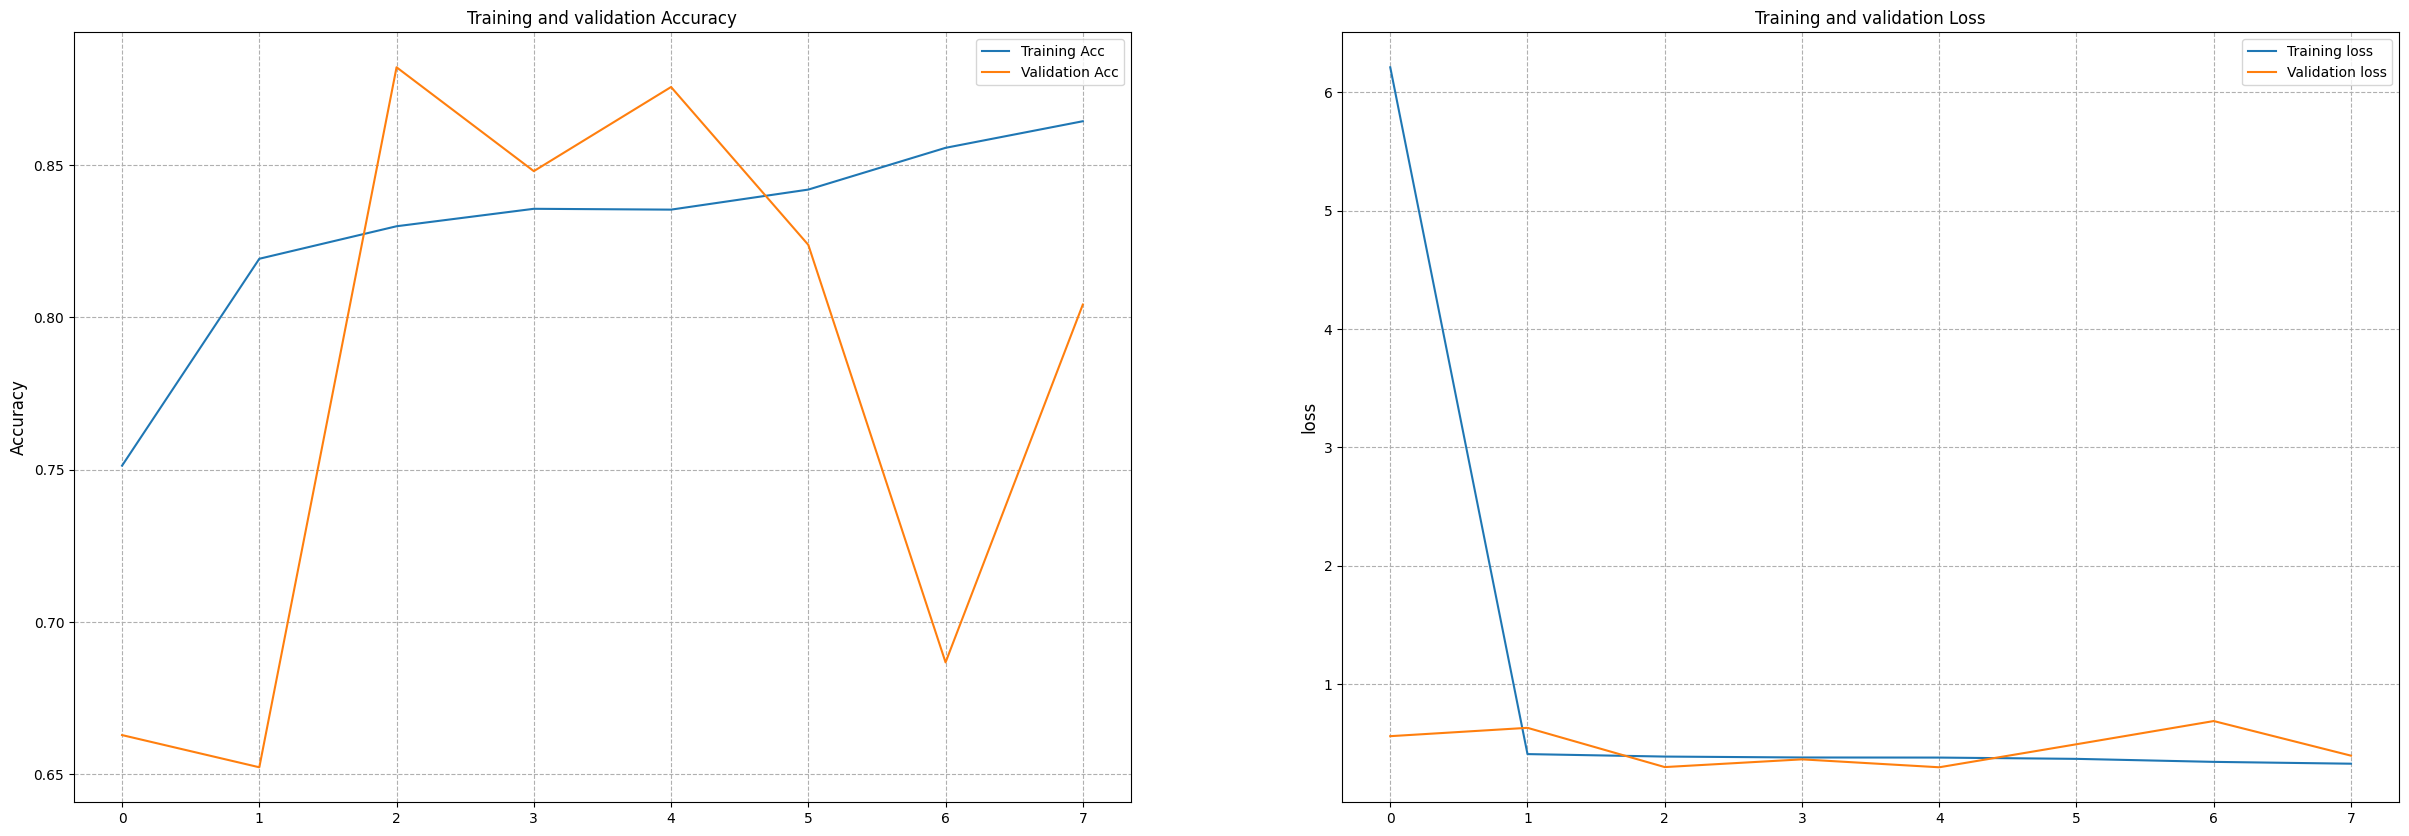

In [150]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann_func2.history['accuracy'], label='Training Acc')
plt.plot(history_ann_func2.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann_func2.history['loss'], label='Training loss')
plt.plot(history_ann_func2.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [151]:
test_results= model_func2.evaluate(X_test,y_test, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

230/230 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8794
Test loss: 0.3006
Test Accuracy: 0.8794


In [152]:
y_pred= model_func2.predict(X_test)
y_pred_th05= tf.where(y_pred >= 0.5, 1,0)
y_pred_th04= (y_pred > 0.4)
y_pred_th03= (y_pred > 0.3)

print(f'model functional treshold 0.5, recall score: {recall_score(y_test, y_pred_th05):.4f}')
print(f'model functional treshold 0.4, recall score: {recall_score(y_test, y_pred_th04):.4f}')
print(f'model functional treshold 0.3, recall score: {recall_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model functional treshold 0.5, accuracy score: {accuracy_score(y_test, y_pred_th05):.4f}')
print(f'model functional treshold 0.4, accuracy score: {accuracy_score(y_test, y_pred_th04):.4f}')
print(f'model functional treshold 0.3, accuracy score: {accuracy_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model functional treshold 0.5, precision score: {precision_score(y_test, y_pred_th05):.4f}')
print(f'model functional treshold 0.4, precision score: {precision_score(y_test, y_pred_th04):.4f}')
print(f'model functional treshold 0.3, precision score: {precision_score(y_test, y_pred_th03):.4f}')
print('-------')
print(f'model functional treshold 0.5, f1 score: {f1_score(y_test, y_pred_th05):.4f}')
print(f'model functional treshold 0.4, f1 score: {f1_score(y_test, y_pred_th04):.4f}')
print(f'model functional treshold 0.3, f1 score: {f1_score(y_test, y_pred_th03):.4f}')

230/230 [==============================] - 0s 1ms/step
model functional treshold 0.5, recall score: 0.8964
model functional treshold 0.4, recall score: 0.9307
model functional treshold 0.3, recall score: 0.9566
-------
model functional treshold 0.5, accuracy score: 0.8794
model functional treshold 0.4, accuracy score: 0.8756
model functional treshold 0.3, accuracy score: 0.8565
-------
model functional treshold 0.5, precision score: 0.8826
model functional treshold 0.4, precision score: 0.8528
model functional treshold 0.3, precision score: 0.8117
-------
model functional treshold 0.5, f1 score: 0.8894
model functional treshold 0.4, f1 score: 0.8900
model functional treshold 0.3, f1 score: 0.8782


In [167]:
confusion_matrix(y_test, y_pred_th04)

array([[2727,  637],
       [ 275, 3691]])

In [168]:
confusion_matrix(y_test, y_pred_th04).ravel()

array([2727,  637,  275, 3691])

In [169]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_th04).ravel()
print(fn)
print(fp)

275
637


In [170]:
print(classification_report(y_test, y_pred_th04, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.85      0.93      0.89      3966
           0       0.91      0.81      0.86      3364

    accuracy                           0.88      7330
   macro avg       0.88      0.87      0.87      7330
weighted avg       0.88      0.88      0.87      7330




[[2727  637]
 [ 275 3691]]


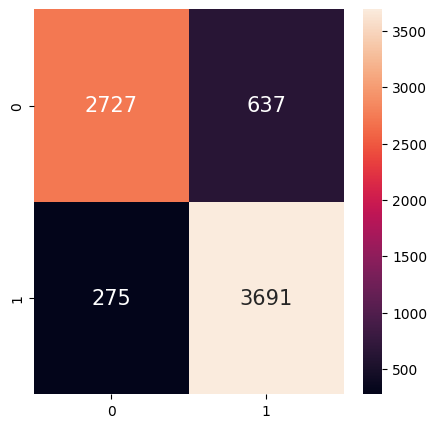

In [171]:
plt.subplots(figsize=(5,5))
cf_matrix = confusion_matrix(y_test, y_pred_th04)
print(f'\n{cf_matrix}')
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, 
            # cmap = cmap1, 
            annot = True, 
            annot_kws = {'size':15}, fmt='g');

# Model Saving

In [158]:
with open("pipeline.pkl", "wb") as f:
   joblib.dump(preproc_pipeline, f)

In [172]:
model = model_func2  # Get model (Sequential, Functional Model, or Model subclass)
model.save('model.h5')